<a href="https://colab.research.google.com/github/Xitij248/GenerativeAI-Timespro/blob/main/Kshitij_assessment1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Convert to a pandas DataFrame for easier viewing
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

# Display the first 5 rows of the DataFrame
display(df_wine.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [92]:

from sklearn.model_selection import train_test_split


#split the target column from the dataset
X = df_wine.drop('target', axis=1)
Y = df_wine['target']

#split the training data into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=89)


display(X_train.head())
display(y_train.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


,target
134,2
41,0
39,0
163,2
145,2


Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classify = LogisticRegression(max_iter= 7000, random_state=89)
classify.fit(X_train, y_train)

acc = accuracy_score(y_test, classify.predict(X_test)) * 100
print(f"Logistic Regression - accuracy : {acc:.2f}%")

Logistic Regression - accuracy : 90.74%


SVM with RBF kernel

In [94]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 3. Create an SVM classifier with an RBF kernel
#    - 'kernel='rbf'' specifies the RBF kernel
#    - 'C' is the regularization parameter (controls trade-off between margin maximization and misclassification)
#    - 'gamma' defines the influence of a single training example; 'scale' uses 1 / (n_features * X.var())
svm_rbf = SVC(kernel='rbf', C=2.5, gamma='scale', random_state=89)

# 4. Train the model
svm_rbf.fit(X_train, y_train)

# 5. Make predictions
y_pred = svm_rbf.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 74.07%


Decision Tree

Model Accuracy: 92.59%


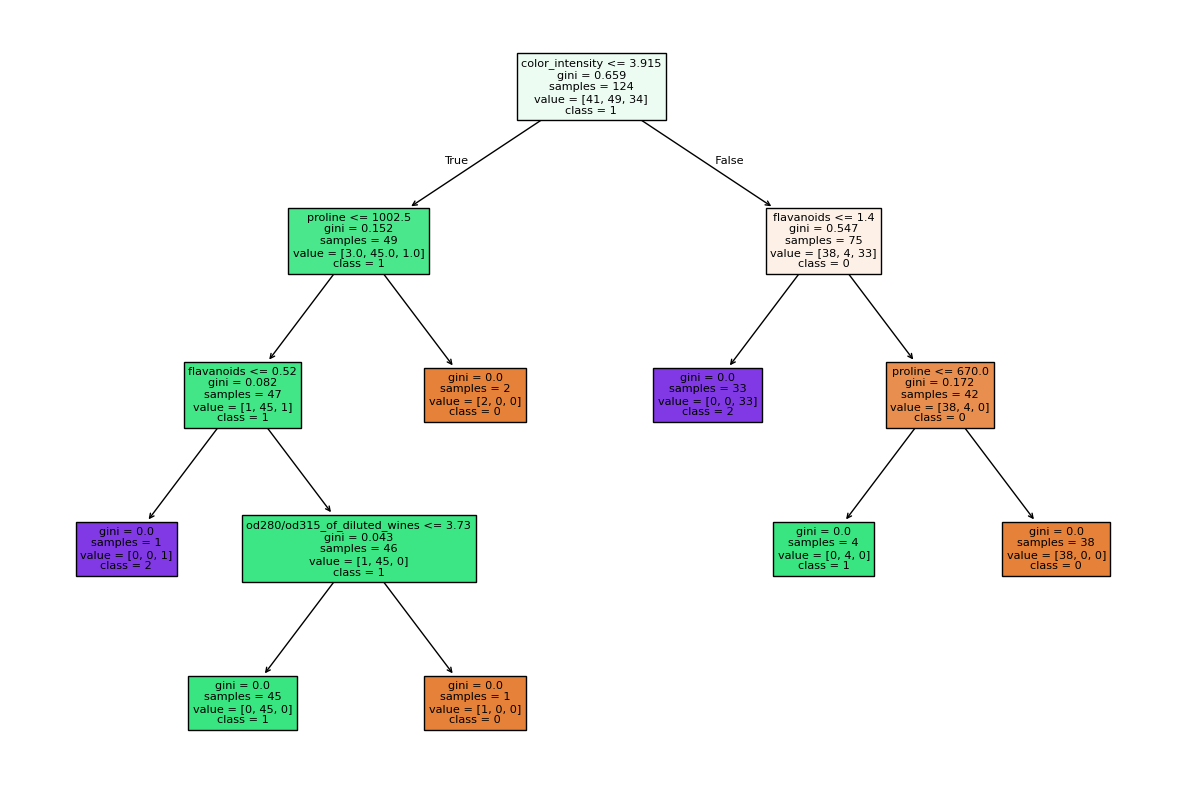

In [95]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print(f"Model Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_.astype(str), filled=True)
plt.show()

Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
# n_estimators: number of trees in the forest
# random_state: for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}%")

Random Forest Classifier Accuracy: 98.15%


Probabilistic Neural Network (PNN)

In [97]:
import numpy as np
from sklearn.metrics import accuracy_score

# PNN implementation
class PNN:
    def __init__(self, sigma=1.0):
        self.sigma = sigma
        self.X_train = None
        self.y_train = None
        self.classes_ = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y)

    def _gaussian_kernel(self, x1, x2):
        return np.exp(-np.sum((x1 - x2)**2) / (2 * self.sigma**2))

    def predict_proba(self, X_test):
        probabilities = []
        for x_test_sample in X_test.values: # Assuming X_test is a DataFrame
            class_scores = []
            for c in self.classes_:
                # Select training samples for the current class
                X_c = self.X_train[self.y_train == c]

                # Calculate sum of kernel values for the test sample against this class's training samples
                sum_kernel = sum(self._gaussian_kernel(x_test_sample, x_train_sample) for x_train_sample in X_c.values)
                class_scores.append(sum_kernel)
            probabilities.append(class_scores)

        # Normalize probabilities
        probabilities = np.array(probabilities)
        sum_rows = probabilities.sum(axis=1, keepdims=True)
        # Avoid division by zero if all scores are zero for a sample
        normalized_probabilities = np.where(sum_rows == 0, 0, probabilities / sum_rows)
        return normalized_probabilities

    def predict(self, X_test):
        probabilities = self.predict_proba(X_test)
        return self.classes_[np.argmax(probabilities, axis=1)]

# Initialize and train the PNN classifier
# sigma is the smoothing parameter
pnn_classifier = PNN(sigma=8)
pnn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pnn = pnn_classifier.predict(X_test)

# Evaluate the model
accuracy_pnn = accuracy_score(y_test, y_pred_pnn) * 100
print(f"PNN Classifier Accuracy: {accuracy_pnn:.2f}%")

PNN Classifier Accuracy: 81.48%


Multi-Layer Perceptron (MLP) Classifier

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the MLP Classifier
# hidden_layer_sizes: A tuple representing the number of neurons in each hidden layer.
#                     For example, (100,) means one hidden layer with 100 neurons.
#                     (50, 50) means two hidden layers with 50 neurons each.
# max_iter: Maximum number of iterations for the solver to converge.
# random_state: For reproducibility.
mlp_classifier = MLPClassifier(hidden_layer_sizes=(75,100), max_iter=10000, random_state=89)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100
print(f"MLP Classifier Accuracy: {accuracy_mlp:.2f}%")

MLP Classifier Accuracy: 90.74%


### Evaluation Report for All Classifiers

--- Logistic Regression ---
Accuracy: 90.74%
F1 Score: 90.71%


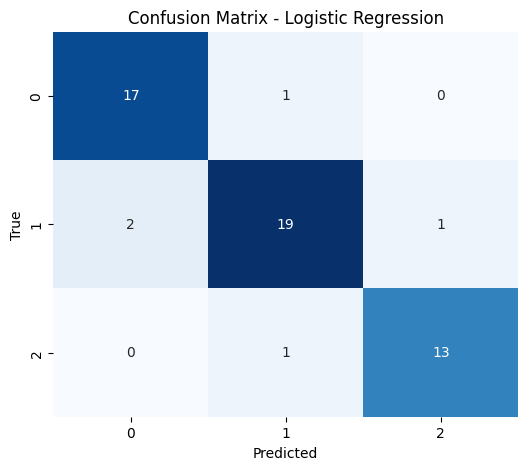



--- SVM with RBF Kernel ---
Accuracy: 98.15%
F1 Score: 98.15%


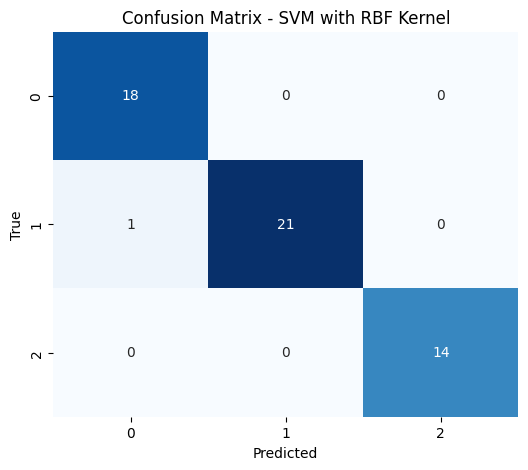



--- Decision Tree ---
Accuracy: 92.59%
F1 Score: 92.64%


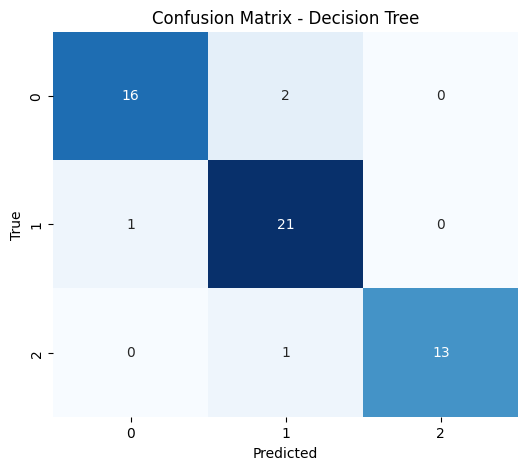



--- Random Forest ---
Accuracy: 98.15%
F1 Score: 98.15%


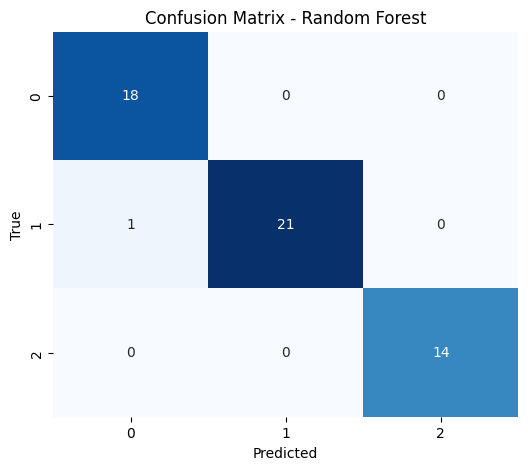



--- PNN ---
Accuracy: 81.48%
F1 Score: 81.24%


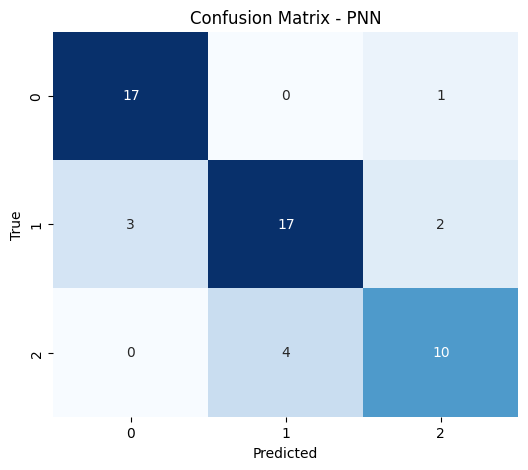



--- MLP Classifier ---
Accuracy: 90.74%
F1 Score: 90.71%


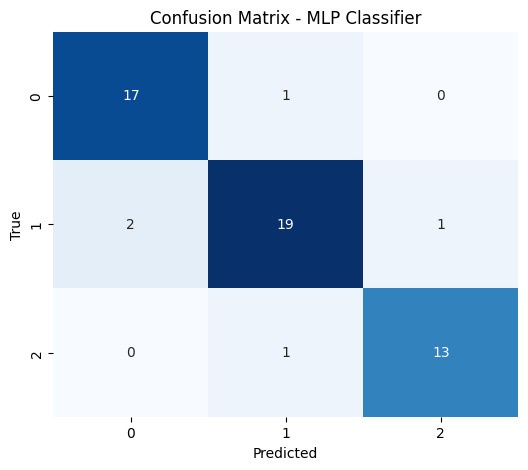

In [99]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classifier(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred, average='weighted') * 100 # Use weighted for multi-class
    cm = confusion_matrix(y_true, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"F1 Score: {f1:.2f}%")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("\n")

# Logistic Regression
# y_test, classify.predict(X_test) are available from cell 9l-EFTqBQcIt
# acc is already calculated as accuracy_score(y_test, classify.predict(X_test)) * 100
evaluate_classifier('Logistic Regression', y_test, classify.predict(X_test))

# SVM with RBF kernel
# y_pred and accuracy are available from cell EpNyiSCyR9Od
evaluate_classifier('SVM with RBF Kernel', y_test, y_pred)

# Decision Tree
# y_pred and accuracy are available from cell 6nrfOljQTdho
evaluate_classifier('Decision Tree', y_test, dt_classifier.predict(X_test))

# Random Forest
# y_pred and accuracy are available from cell hD2dHcjjVQo1
evaluate_classifier('Random Forest', y_test, rf_classifier.predict(X_test))

# PNN
# y_pred_pnn and accuracy_pnn are available from cell 4282fe5d
evaluate_classifier('PNN', y_test, y_pred_pnn)

# MLP Classifier
# y_pred_mlp and accuracy_mlp are available from cell feac7cf3
evaluate_classifier('MLP Classifier', y_test, mlp_classifier.predict(X_test))


### Visualizing Classifier Performance

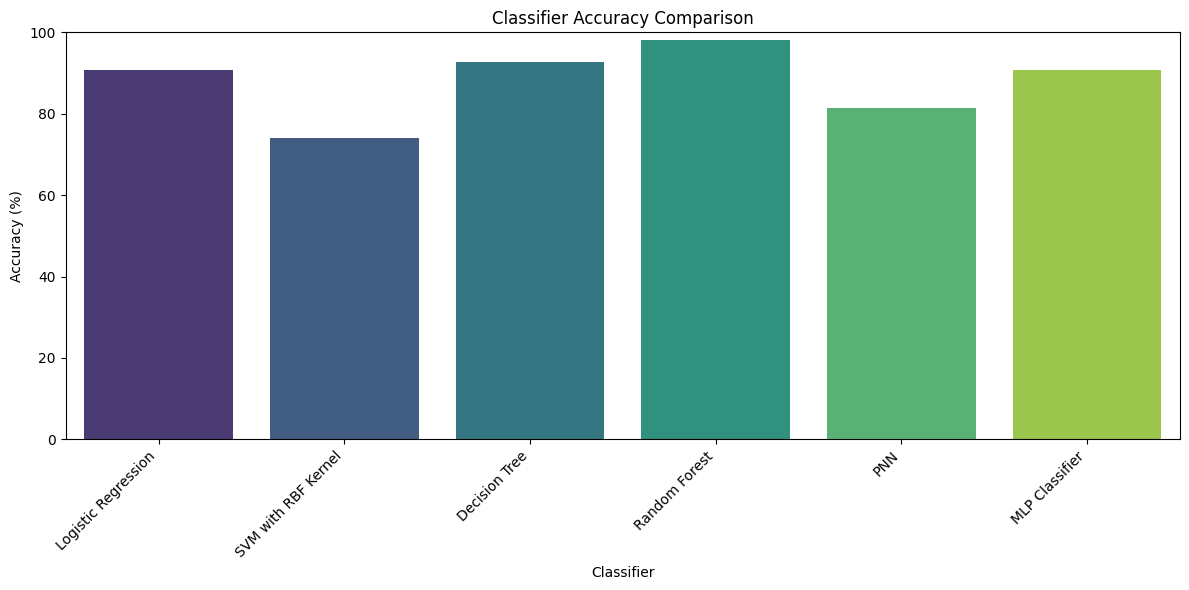

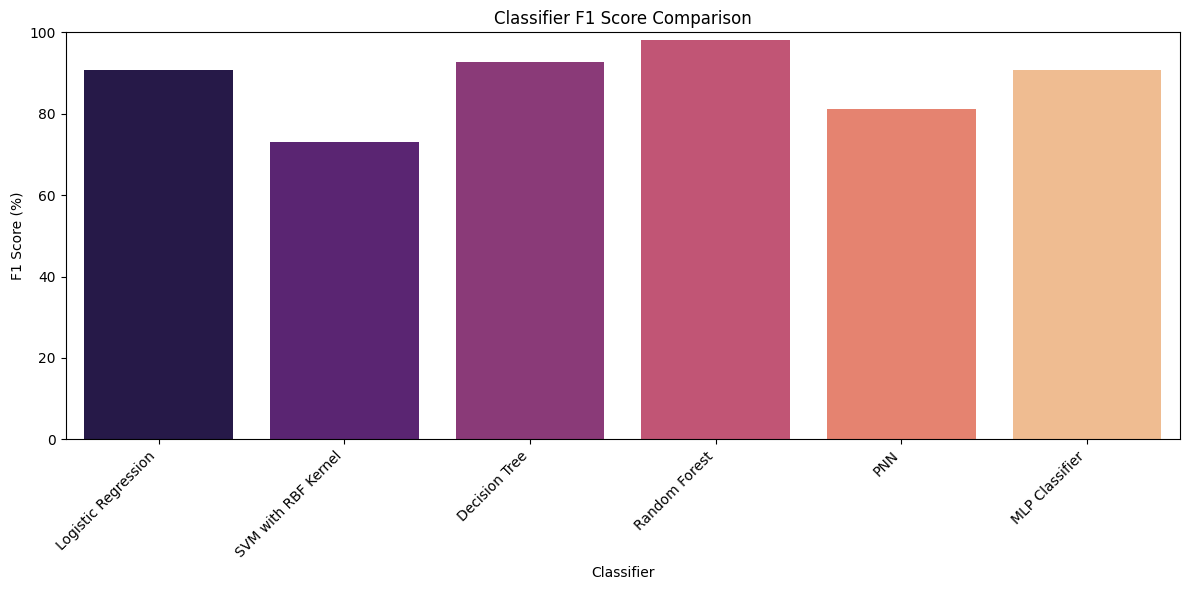

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Gather predictions and true labels for all models
models = {
    'Logistic Regression': {'y_pred': classify.predict(X_test), 'y_true': y_test},
    'SVM with RBF Kernel': {'y_pred': svm_rbf.predict(X_test), 'y_true': y_test},
    'Decision Tree': {'y_pred': dt_classifier.predict(X_test), 'y_true': y_test},
    'Random Forest': {'y_pred': rf_classifier.predict(X_test), 'y_true': y_test},
    'PNN': {'y_pred': pnn_classifier.predict(X_test), 'y_true': y_test},
    'MLP Classifier': {'y_pred': mlp_classifier.predict(X_test), 'y_true': y_test}
}

# Calculate metrics for each model
results = []
for name, data in models.items():
    acc = accuracy_score(data['y_true'], data['y_pred']) * 100
    f1 = f1_score(data['y_true'], data['y_pred'], average='weighted') * 100
    results.append({'Classifier': name, 'Accuracy': acc, 'F1 Score': f1})

df_results = pd.DataFrame(results)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Accuracy', hue='Classifier', data=df_results, palette='viridis', legend=False)
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100) # Set y-axis limit from 0 to 100
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting F1 Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='F1 Score', hue='Classifier', data=df_results, palette='magma', legend=False)
plt.title('Classifier F1 Score Comparison')
plt.ylabel('F1 Score (%)')
plt.ylim(0, 100) # Set y-axis limit from 0 to 100
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()